In [1]:
import numpy as np
import pandas as pd

In [2]:
#variables

num_clusters = 1

In [3]:
url="https://raw.githubusercontent.com/saurabhk7/Cognitive-Classification-and-Reasoning/master/feb-2019-survey-final-3.csv"

df = pd.read_csv(url)

mapping_df=pd.read_csv("mapping.csv")
for feature_name in mapping_df.columns:
    if feature_name=='S No':
        continue
    max_value = mapping_df[feature_name].max()
    min_value = mapping_df[feature_name].min()
    mapping_df[feature_name] = (mapping_df[feature_name] - min_value) / (max_value - min_value)
print(mapping_df)

    S No  Aptitude and Logic (A1)  Independent Studies (A2)  Interest (A3)  \
0    3.0                      0.0                  0.857143       0.888889   
1    4.0                      0.6                  0.000000       0.000000   
2    5.0                      0.4                  0.000000       0.000000   
3    6.0                      0.4                  0.000000       0.000000   
4    7.0                      1.0                  0.714286       0.444444   
5    8.0                      0.0                  0.285714       0.555556   
6    9.0                      0.3                  0.714286       0.444444   
7   10.0                      0.6                  0.142857       0.000000   
8   11.0                      0.0                  0.000000       0.000000   
9   12.0                      0.0                  0.000000       0.000000   
10  13.0                      0.0                  0.000000       0.000000   
11  14.0                      0.0                  0.142857     

In [4]:
df.drop_duplicates(subset ="Email Address", 
                     keep = 'last', inplace = True) 
df.head()

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,2/14/2019 13:39:07,admin,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.99,Average,Not Participated,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [5]:
df.shape

(267, 41)

In [6]:
# An array of the column names
df.columns 

Index(['Timestamp', 'Email Address', 'College Name?', 'Current Branch?',
       'Current Year?', 'What is your Grade in College (GPA)?',
       'How would you rate your puzzle solving efficiency?',
       'Have you prepared for any olympiads/national level competitive examinations in your school days?',
       'Have you actively participated in activities like chess or abacus etc?',
       'Have you been "extensively" involved in the following? [Competitive Coding]',
       'Have you been "extensively" involved in the following? [Sodtware Development]',
       'Have you been "extensively" involved in the following? [ML/AI Projects or Research]',
       'Have you been "extensively" involved in the following? [Mathematics and Logical Reasoning]',
       'Have you been "extensively" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]',
       'Have you been "extensively" involved in the following? [Literature/Blogging ]',
   

In [7]:
# Columns and their types
df.dtypes

Timestamp                                                                                                                                           object
Email Address                                                                                                                                       object
College Name?                                                                                                                                       object
Current Branch?                                                                                                                                     object
Current Year?                                                                                                                                       object
What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                    

In [8]:
# Converts the frame to a two-dimensional table
df.values 

array([['2/14/2019 13:39:07', 'admin',
        'Pune Institute of Computer Technology', ..., 'Do not prefer',
        'Do not prefer', 'Do not prefer'],
       ['2/14/2019 13:39:07', 'abizerL123@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Prefer'],
       ['2/14/2019 13:42:31', 'saurabhkshirsagar35@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Do not prefer',
        'Prefer', 'Prefer'],
       ...,
       ['2/18/2019 11:57:28', 'nipunkhivansara911@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Do not prefer'],
       ['2/18/2019 12:00:18', 'piyush140899@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Prefer'],
       ['2/18/2019 12:02:36', 'aditi.salunke8799@gmail.com',
        'Pune Institute of Computer Technology', ..., 'Prefer', 'Prefer',
        'Prefer']], dtype=object)

In [9]:
# Displays descriptive stats for all columns
df.describe()

,What is your Grade in College (GPA)?
count,267.000000
mean,8.717940
std,0.994465
min,0.000000
25%,8.360000
50%,8.900000
75%,9.240000
max,9.990000


In [10]:
import matplotlib
import matplotlib.pyplot as plt

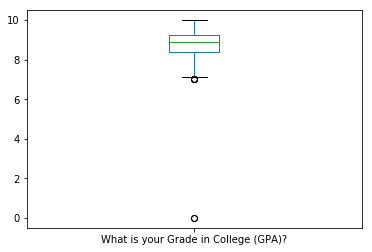

In [11]:
df.plot(kind='box')

In [12]:
#df = df.drop(['Timestamp','Email Address'], axis = 1)

In [13]:
df.head()

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,2/14/2019 13:39:07,admin,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.99,Average,Not Participated,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [14]:
df = df.loc[df['College Name?'] == 'Pune Institute of Computer Technology']
dfemail = df.copy()

df = df.drop(['Timestamp','Email Address','Current Branch?', 'Current Year?'], axis = 1)

In [15]:
df.head()

,College Name?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Pune Institute of Computer Technology,9.99,Average,Not Participated,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,Pune Institute of Computer Technology,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Pune Institute of Computer Technology,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Pune Institute of Computer Technology,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Pune Institute of Computer Technology,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [16]:
df.shape

(258, 37)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df.dtypes

College Name?                                                                                                                                       object
What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                                                                                                  object
Have you prepared for any olympiads/national level competitive examinations in your school days?                                                    object
Have you actively participated in activities like chess or abacus etc?                                                                              object
Have you been "extensively" involved in the following? [Competitive Coding]                                                                         object
Have you been "extensively" involved in the following? [Sodtware Devel

In [19]:
df = df.drop(['College Name?'], axis = 1)

In [20]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [21]:
dfcat = df.loc[:, df.columns != 'What is your Grade in College (GPA)?']

In [22]:
dfcat.head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [23]:
# Categorical boolean mask
categorical_feature_mask = dfcat.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dfcat.columns[categorical_feature_mask].tolist()

In [24]:
categorical_cols

['How would you rate your puzzle solving efficiency?',
 'Have you prepared for any olympiads/national level competitive examinations in your school days?',
 'Have you actively participated in activities like chess or abacus etc?',
 'Have you been "extensively" involved in the following? [Competitive Coding]',
 'Have you been "extensively" involved in the following? [Sodtware Development]',
 'Have you been "extensively" involved in the following? [ML/AI Projects or Research]',
 'Have you been "extensively" involved in the following? [Mathematics and Logical Reasoning]',
 'Have you been "extensively" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]',
 'Have you been "extensively" involved in the following? [Literature/Blogging ]',
 'What are your plans after your undergraduation?',
 'Are you attentive during lectures at college?',
 'Do you feel the lectures are slow paced or repetitive in general?',
 'Do you ask questions

In [25]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [26]:
dfcat[categorical_cols]

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,High,Not Participated,No,Yes,No,No,Yes,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
6,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
7,Average,Not Participated,No,No,Yes,No,No,No,Yes,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
8,Average,Not Participated,No,No,Yes,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
9,Average,Participated and Prepared,Yes,No,Yes,Yes,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer


In [27]:
# apply le on categorical feature columns
dfcat[categorical_cols] = dfcat[categorical_cols].apply(lambda col: le.fit_transform(col))

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [28]:
dfcat[categorical_cols].head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,0,1,...,0,0,1,1,1,0,0,1,1,1
2,0,1,0,0,1,1,0,0,0,4,...,0,1,1,1,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,4,...,0,0,1,1,0,1,0,1,1,1
4,0,1,0,1,1,0,1,1,0,4,...,1,1,1,1,1,0,1,1,1,1


In [29]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [30]:
dfcat.insert(loc=0, column='GPA', value=df['What is your Grade in College (GPA)?'])

In [31]:
dfcat.head(10)

,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.40,1,0,0,1,1,0,1,1,0,...,0,0,1,1,1,0,0,1,1,1
2,9.37,0,1,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,1
3,9.20,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,1,1
4,9.32,0,1,0,1,1,0,1,1,0,...,1,1,1,1,1,0,1,1,1,1
5,8.00,1,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,0,1,1,0
6,7.60,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,9.00,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
8,8.79,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,8.40,0,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [32]:
bin = [-1,0,7,7.5,8,8.25,8.5,8.75,9,9.25,9.5,10]
category = pd.cut(dfcat['GPA'],bin)

In [33]:
dfcat.insert(loc=0, column='Binned GPA', value=category)

In [34]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,"(9.5, 10.0]",9.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(9.25, 9.5]",9.40,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,"(9.25, 9.5]",9.37,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,"(9.0, 9.25]",9.20,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,"(9.25, 9.5]",9.32,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,"(7.5, 8.0]",8.00,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,"(7.5, 8.0]",7.60,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,"(8.75, 9.0]",9.00,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,"(8.75, 9.0]",8.79,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,"(8.25, 8.5]",8.40,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [35]:
dfcat['GPA'].describe()

count    258.000000
mean       8.736783
std        1.001325
min        0.000000
25%        8.400000
50%        8.910000
75%        9.250000
max        9.990000
Name: GPA, dtype: float64

In [36]:
dfcat['Binned GPA'] = dfcat['Binned GPA'].astype('str') 
#dfcat.head()
#dfcat['Binned GPA'].describe()
dfcat['Binned GPA'] = dfcat['Binned GPA'].map({'(-1.0, 0.0]': 0,'(0.0, 7.0]': 0, '(7.0, 7.5]': 1, '(7.5, 8.0]': 2, '(8.0, 8.25]': 3, '(8.25, 8.5]': 4, '(8.5, 8.75]': 5, '(8.75, 9.0]': 6, '(9.0, 9.25]': 7, '(9.25, 9.5]': 8, '(9.5, 10.0]': 9})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
#dfcat['Binned GPA']

In [38]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9,9.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,9.40,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,8,9.37,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,7,9.20,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,8,9.32,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,2,8.00,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,2,7.60,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,6,9.00,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,6,8.79,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,4,8.40,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [39]:
dfcat = dfcat.drop(['GPA'], axis = 1)

In [40]:
dfcat.isnull().values.any()
pd.set_option('display.max_columns', 500)
# weights
mapping_df = mapping_df.drop(["S No"], axis=1)
mapping_df

,Aptitude and Logic (A1),Independent Studies (A2),Interest (A3),Theoretical Knowledge (A4),Practical Knowledge (A5),Seriousness (A6),Hardwork (A7),Retention (A8),Extra Curricular (A9)
0,0.0,0.857143,0.888889,1.0,0.4,1.000000,1.000000,1.000000,0.2
1,0.6,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.4,0.000000,0.000000,0.0,0.0,0.090909,0.181818,0.000000,0.0
3,0.4,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.444444,0.0
4,1.0,0.714286,0.444444,0.2,0.9,0.000000,0.272727,0.000000,1.0
5,0.0,0.285714,0.555556,0.3,0.6,0.000000,0.272727,0.000000,0.8
6,0.3,0.714286,0.444444,0.3,0.6,0.000000,0.272727,0.000000,1.0
7,0.6,0.142857,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.1
8,0.0,0.000000,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.6
9,0.0,0.000000,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.7


In [41]:
w, h = 37, 9
weights = [[0 for x in range(w)] for y in range(h)] 
# len(weights[0])
# for index, row in mapping_df.iterrows():
for ind, column in enumerate(mapping_df.columns):
    weights[ind] = mapping_df[column]
print(weights)
#each row is an attribute, and each column is a question its mapped to, eg: weights[0][11] is value of aptitude of question 12 (0-based indexing)

[0     0.0
1     0.6
2     0.4
3     0.4
4     1.0
5     0.0
6     0.3
7     0.6
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.2
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.1
30    0.1
31    0.1
32    0.1
33    0.0
34    0.0
35    0.0
36    0.0
Name: Aptitude and Logic (A1), dtype: float64, 0     0.857143
1     0.000000
2     0.000000
3     0.000000
4     0.714286
5     0.285714
6     0.714286
7     0.142857
8     0.000000
9     0.000000
10    0.000000
11    0.142857
12    0.000000
13    0.000000
14    0.428571
15    0.428571
16    0.000000
17    0.142857
18    0.571429
19    0.000000
20    0.285714
21    0.000000
22    0.000000
23    0.428571
24    0.000000
25    0.142857
26    0.142857
27    0.714286
28    0.571429
29    0.142857
30    0.142857
31    0.142857
32    0.428571
33    0.000000
34    1.000000
35    0.857143
36    0.000000
Name: Independent Studies (

In [42]:
from kmodes.kmodes import KModes


In [43]:
df_dummy = pd.get_dummies(dfcat)

In [47]:
def ss_attributes(a, b, attribute_index, **_):
    #print("Called ss")
    #print(a,b)
    cost = []
    for i in range(0,len(a)):
        row_cost = 0
        for j in range(0,len(a[i])):
            if(a[i][j]!=b[j]):
                row_cost+=abs(a[i][j]-b[j])*weights[attribute_index][j]
        cost.append(row_cost)
        
    return np.array(cost)

In [45]:
df_dummy = df_dummy.iloc[1:,:]
dfemail = dfemail.iloc[1:,:]

In [48]:
#isme jhol hai
for i in range(0,len(weights)):
    km = KModes(n_clusters=3, init='Huang', n_init=10, verbose=0, cat_dissim=ss_attributes(attribute_index=i))
    clusters = km.fit_predict(df_dummy)
    print("Clusters: ",3," n_init: ",10," Best cost: ",km.cost_)
#     df_dummy['clusters'] = clusters

TypeError: ss_attributes() missing 2 required positional arguments: 'a' and 'b'

In [ ]:
def ss(a, b, **_):
    #print("Called ss")
    #print(a,b)
    cost = []
    for i in range(0,len(a)):
        row_cost = 0
        for j in range(0,len(a[i])):
            if(a[i][j]!=b[j]):
                row_cost+=abs(a[i][j]-b[j])*w[j]
        cost.append(row_cost)
        
    return np.array(cost)

In [ ]:
run_elbow = 0

if(run_elbow):
    xx=[]
    yy=[]
    num_init=20
    for i in range(1,11):
        km = KModes(n_clusters=i, init='Huang', n_init=num_init, verbose=0, cat_dissim=ss)
        clusters = km.fit_predict(df_dummy)
        print("Clusters: ",i," n_init: ",num_init," Best cost: ",km.cost_)
        xx.append(i)
        yy.append(km.cost_)
    plt.plot(xx,yy,'go-',label='Cluster vs Cost')
    plt.show()
else:
    km = KModes(n_clusters=num_clusters, init='Huang', n_init=40, verbose=0, cat_dissim=ss)
    clusters = km.fit_predict(df_dummy)
    print("Clusters: ",num_clusters," n_init: ",40," Best cost: ",km.cost_)
    df_dummy['clusters'] = clusters

In [ ]:
df_dummy.shape
df_dummy['clusters'].head(10)
df_dummy.head(20)

In [ ]:
km.cluster_centroids_

In [ ]:
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA

In [ ]:
df_dummy.shape

In [ ]:
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.iloc[:,:-1])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"])
plt.show()


In [ ]:
categorical_cols.insert(0,'Binned GPA')
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(categorical_cols)),categorical_cols,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

In [ ]:
dfemail.head()

In [ ]:
dfemail.iloc[0]["Email Address"]

In [ ]:
kmodes_labels = km.labels_
print (kmodes_labels)



arr=[]
for i in range(0,num_clusters):
    arr.append([])
for i in range(0, len(kmodes_labels)):
    arr[kmodes_labels[i]].append((dfemail.iloc[i])["Email Address"])
for i in range(0,num_clusters):
    print("Cluster ",i," :",arr[i])
    print()

In [ ]:
kmodescent = km.cluster_centroids_
shape = kmodescent.shape
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
print (shape[0])
for i in range(shape[0]):
    if sum(kmodescent[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodescent[i,:]
        for j in df_dummy.columns[np.nonzero(cent)]:
            print(j)